In [10]:
import json
import pandas as pd


df = pd.read_json('facebookData.json')
df.head(3)

,timestamp,attachments,data,title,tags
0,2011-11-06 14:53:44,[{'data': [{'media': {'uri': 'posts/media/Time...,[],Sara Shahin added a new photo.,NaN
1,2011-11-06 14:56:38,[{'data': [{'media': {'uri': 'posts/media/Time...,[],Sara Shahin added a new photo.,NaN
2,2011-11-06 14:59:09,[{'data': [{'media': {'uri': 'posts/media/Time...,[],Sara Shahin added a new photo.,NaN


In [11]:
# rename the timestamp column
df.rename(columns={'timestamp': 'date'}, inplace=True)

#drop some unnecessary columns
df = df.drop(['attachments', 'title', 'tags'], axis=1)

# making sure it's datetime format
pd.to_datetime(df['date'])

df.head(3)

,date,data
0,2011-11-06 14:53:44,[]
1,2011-11-06 14:56:38,[]
2,2011-11-06 14:59:09,[]


In [8]:
print(df.shape)
df.tail(3)

(339, 2)


,date,data
336,2017-11-08 19:23:59,[{'update_timestamp': 1510169039}]
337,2017-11-23 21:12:11,[]
338,2017-11-28 10:18:24,[{'post': 'Monkey Puzzle Nursery ððð'}]


In [12]:
df = df.set_index('date')
count_postFace = df['data'].resample('MS').size()

count_postFace 


date
2011-11-01     6
2011-12-01     5
2012-01-01     6
2012-02-01     6
2012-03-01     3
              ..
2017-07-01    11
2017-08-01     9
2017-09-01    14
2017-10-01     6
2017-11-01     6
Freq: MS, Name: data, Length: 73, dtype: int64

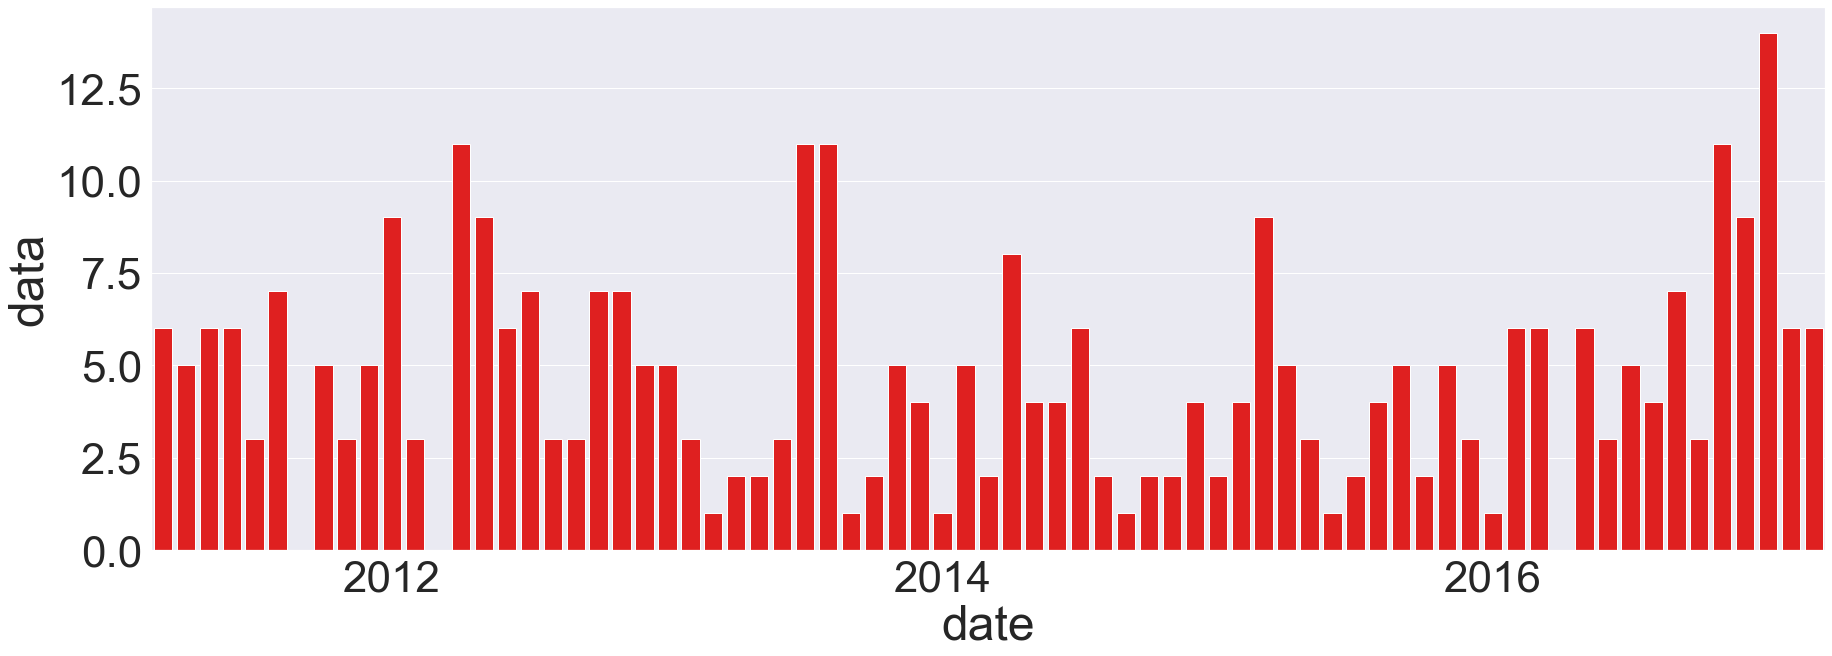

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size and font size
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=4)

# set x labels
x_labels = count_postFace.index
# print(x_labels)

#create bar plot
sns.barplot(x = x_labels, y = count_postFace, color="red")
# print(sns.barplot(x_labels, count_postFace, color="red"))

# a tick every other year in the resultant chart
positionMonths24 = np.arange(10, len(x_labels), step=24)
# print(positionMonths24 )

# #r reformat the dates in the chart so that only the year is displayed onlyplt.ylabel("count_postFace")
plt.xticks(positionMonths24, x_labels[positionMonths24].strftime("%Y"))

# display the plot
plt.show()